<a href="https://colab.research.google.com/github/PragyaAgrawal2008/Introduction-To-Robotics-Assignemnt/blob/main/2019_BCS_040_IR_ASG_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing all modules
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import regularizers
import numpy as np


In [5]:
l1 = l2 = l3 = 7 # length

In [6]:
def three_link_manipulator_dataset():
    rows = []
    for i in range(1, 100000):
        theta1 = round(random.uniform(0, math.pi), 2)
        theta2 = round(random.uniform(-math.pi, 0), 2)
        theta3 = round(random.uniform(-math.pi/2, math.pi/2), 2)
        
        x = round(l1*math.cos(theta1)+l2*math.cos(theta1+theta2)+l3*math.cos(theta1+theta2+theta3), 2)
        y = round(l1*math.sin(theta1)+l2*math.sin(theta1+theta2)+l3*math.sin(theta1+theta2+theta3), 2)
        phi = round(math.degrees(theta1)+math.degrees(theta2)+math.degrees(theta3), 2)
        
        rows.append([theta1, theta2, theta3, x, y, phi])

    df = pd.DataFrame(rows, columns=['theta1', 'theta2', 'theta3', 'x', 'y', 'phi'])
    df.to_csv('three_link.csv', index=False)
    
three_link_manipulator_dataset()

In [7]:
three_link_data = pd.read_csv('three_link.csv')
three_link_data.head()


,theta1,theta2,theta3,x,y,phi
0,2.69,-0.31,-0.24,-15.14,13.78,122.61
1,2.89,-0.34,-0.65,-14.85,12.27,108.86
2,1.04,-1.42,-0.56,14.17,-2.21,-53.86
3,1.06,-2.94,0.59,3.23,-7.29,-73.91
4,0.63,-0.62,0.21,19.49,5.72,12.61


In [8]:
# Splitting training and testing dataset
X = three_link_data[['x', 'y', 'phi']]
y = three_link_data[['theta1', 'theta2', 'theta3']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)

In [9]:
# Defining model

model = models.Sequential()
model.add(layers.Dense(units=3, input_dim=3, kernel_initializer='uniform'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=3, kernel_initializer = 'uniform', activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 10,815
Trainable params: 10,815
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [11]:
# training model
history = model.fit(train_X, train_y, epochs=30, validation_split=0.1, shuffle=True)

Epoch 1/30
2532/2532 [==============================] - 5s 2ms/step - loss: 0.4576 - accuracy: 0.9041 - val_loss: 0.0519 - val_accuracy: 0.9662
Epoch 2/30
2532/2532 [==============================] - 4s 1ms/step - loss: 0.0393 - accuracy: 0.9672 - val_loss: 0.0303 - val_accuracy: 0.9674
Epoch 3/30
2532/2532 [==============================] - 4s 1ms/step - loss: 0.0288 - accuracy: 0.9720 - val_loss: 0.0215 - val_accuracy: 0.9742
Epoch 4/30
2532/2532 [==============================] - 4s 1ms/step - loss: 0.0228 - accuracy: 0.9748 - val_loss: 0.0221 - val_accuracy: 0.9718
Epoch 5/30
2532/2532 [==============================] - 4s 1ms/step - loss: 0.0206 - accuracy: 0.9764 - val_loss: 0.0208 - val_accuracy: 0.9790
Epoch 6/30
2532/2532 [==============================] - 3s 1ms/step - loss: 0.0195 - accuracy: 0.9763 - val_loss: 0.0156 - val_accuracy: 0.9810
Epoch 7/30
2532/2532 [==============================] - 4s 1ms/step - loss: 0.0186 - accuracy: 0.9774 - val_loss: 0.0151 - val_accuracy:

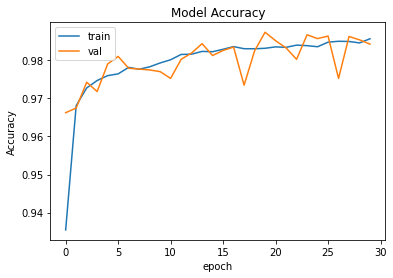

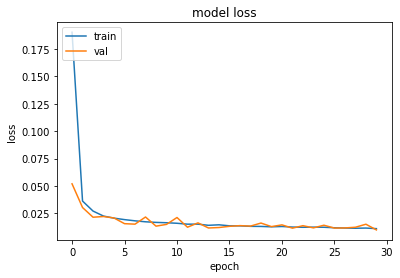

In [12]:
# Plotting model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
# Evaluating the model on test set

test_loss, test_acc = model.evaluate(test_X, test_y)

print('\nTesting Loss = ', test_loss) 
print('Testing Accuracy = ', test_acc)

313/313 [==============================] - 0s 814us/step - loss: 0.0084 - accuracy: 0.9853

Testing Loss =  0.008350931107997894
Testing Accuracy =  0.9853000044822693


In [15]:
def iiitm_dataset():
    rows = []
    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 8
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for T
    arr = np.linspace(9, 10, 100)
    for x in arr:
        y = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 9.5
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for M
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 11
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = ((-y)+29)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = ((y)+19)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 13
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    df = pd.DataFrame(rows, columns=['x', 'y', 'theta'])
    df.to_csv('iiitm.csv', index=False)
    
iiitm_dataset()

In [16]:
def three_link_forward_kinematics(theta1, theta2, theta3):
    x = (np.cos(theta1)*l1)+(np.cos(theta1+theta2)*l2)+(np.cos(theta1+theta2+theta3)*l3)
    y = (np.sin(theta1)*l1)+(np.sin(theta1+theta2)*l2)+(np.sin(theta1+theta2+theta3)*l3)

    return x, y

In [17]:
iiitm_data = pd.read_csv('iiitm.csv')
iiitm_predictions = model.predict(iiitm_data.values)
x_predictions, y_predictions = three_link_forward_kinematics(iiitm_predictions[:,0], iiitm_predictions[:,1], iiitm_predictions[:,2])

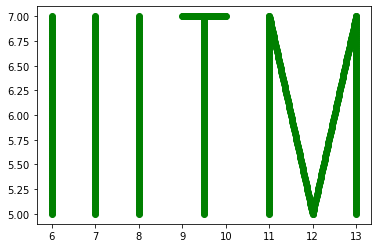

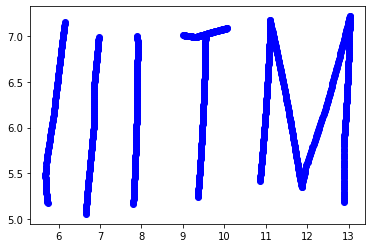

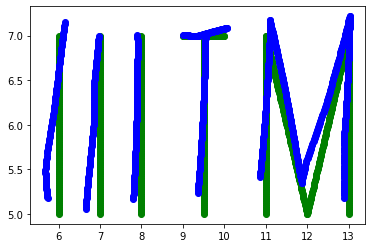

In [18]:
# Original
plt.plot(iiitm_data['x'], iiitm_data['y'], 'go')
plt.show()

# Predicted
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()

# Original and Predicted
plt.plot(iiitm_data['x'], iiitm_data['y'], 'go')
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()

In [ ]:
def iiitm_dataset():
    rows = []
    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 8
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for T
    arr = np.linspace(9, 10, 100)
    for x in arr:
        y = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 9.5
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for M
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 11
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = ((-y)+29)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = ((y)+19)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 13
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    df = pd.DataFrame(rows, columns=['x', 'y', 'theta'])
    df.to_csv('iiitm.csv', index=False)
    
iiitm_dataset()